In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

import sys
import os

In [2]:


#input_dir_simple = 'bootstrap-simple-pdf-toy-study6b-2d-4c'
#input_dir_nn = 'bootstrap-toy-study6b-2d-4c'

input_dir_simple = 'simple-pdf-toy-study6b-2d-7b'
input_dir_nn = 'toy-study6b-2d-7b'

In [3]:
with open('%s/analytic-weights.npy' % input_dir_nn, 'rb') as f :
    weights_analytic = np.load(f)

In [4]:
with open('%s/omnifold-output-weights.npy' % input_dir_nn, 'rb') as f :
    weights_nn = np.load(f)

In [5]:
with open('%s/omnifold-output-weights.npy' % input_dir_simple, 'rb') as f :
    weights_simple = np.load(f)

In [6]:
with open( '%s/train-and-true-samples.npy' % input_dir_nn, 'rb') as f :
    train_pts = np.load(f)
    train_det_pts = np.load(f)
    true_pts = np.load(f)
    true_det_pts = np.load(f)

<function matplotlib.pyplot.show(close=None, block=None)>

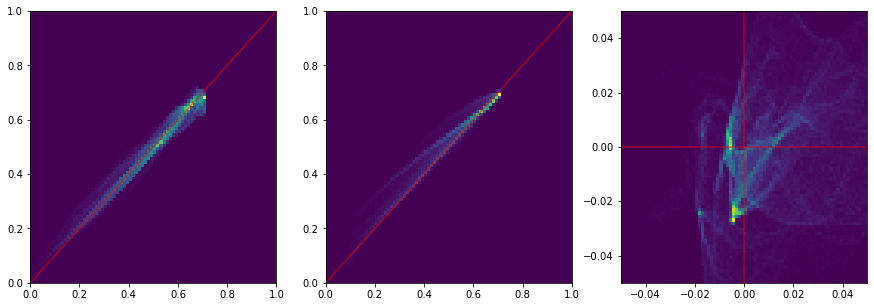

In [18]:
fig,ax = plt.subplots( 1, 3, figsize=(5*3,5))

hbins=80
wmin=0
wmax=1.0

dmin = -0.05
dmax = 0.05


ax[0].hist2d( weights_analytic, weights_nn, bins=[hbins,hbins], range=([wmin,wmax], [wmin,wmax]))
ax[1].hist2d( weights_analytic, weights_simple, bins=[hbins,hbins], range=([wmin,wmax], [wmin,wmax]))
ax[2].hist2d( weights_simple-weights_analytic, weights_nn-weights_analytic, bins=[hbins,hbins], 
             range=([dmin,dmax],[dmin,dmax]))

ax[0].plot((0,wmax),(0,wmax), color='red', alpha=0.5)
ax[1].plot((0,wmax),(0,wmax), color='red', alpha=0.5)

#ax[2].plot((0,wmax),(0,wmax), color='red', alpha=0.5)


ax[2].plot((0,0),(dmin,dmax), color='red', alpha=0.5)
ax[2].plot((dmin,dmax),(0,0), color='red', alpha=0.5)

plt.show

In [8]:
for pi in range(20) :
    print(' %3d :  nn %7.4f   simple %7.4f   analytic %7.4f' % (pi, weights_nn[pi], weights_simple[pi], weights_analytic[pi] ))

   0 :  nn  0.4866   simple  0.5548   analytic  0.5082
   1 :  nn  0.6816   simple  0.6843   analytic  0.7035
   2 :  nn  0.5037   simple  0.5150   analytic  0.5202
   3 :  nn  0.3820   simple  0.3895   analytic  0.3700
   4 :  nn  0.6665   simple  0.6647   analytic  0.6739
   5 :  nn  0.6590   simple  0.6338   analytic  0.6435
   6 :  nn  0.5145   simple  0.5272   analytic  0.5204
   7 :  nn  0.6563   simple  0.6563   analytic  0.6667
   8 :  nn  0.6690   simple  0.6635   analytic  0.6704
   9 :  nn  0.4348   simple  0.4462   analytic  0.4365
  10 :  nn  0.5353   simple  0.5565   analytic  0.5213
  11 :  nn  0.6472   simple  0.6670   analytic  0.6824
  12 :  nn  0.5792   simple  0.6179   analytic  0.5752
  13 :  nn  0.6324   simple  0.6196   analytic  0.6245
  14 :  nn  0.3850   simple  0.4306   analytic  0.4470
  15 :  nn  0.5841   simple  0.6218   analytic  0.6089
  16 :  nn  0.6642   simple  0.6616   analytic  0.6714
  17 :  nn  0.2062   simple  0.1975   analytic  0.1884
  18 :  nn

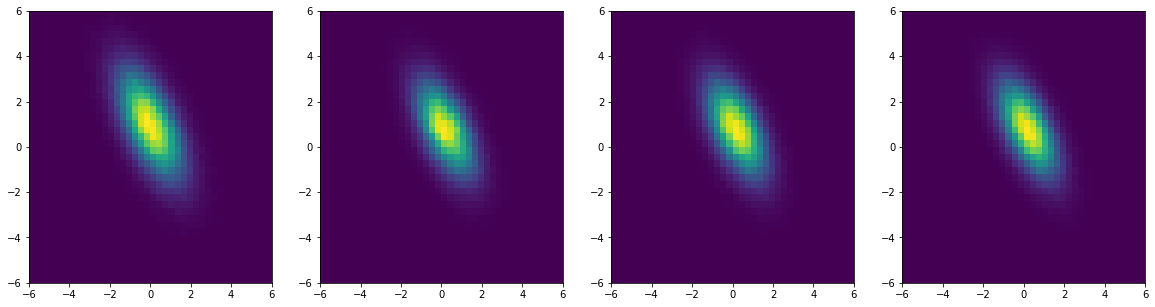

In [9]:

fig,ax = plt.subplots( 1, 4, figsize=(5*4,5))

xmin=-6
xmax=6
hbins=40


(unweighted_hist_vals, hist_binning, _, _) = ax[0].hist2d(train_pts[:,0], train_pts[:,1], bins=([hbins,hbins]), range=([xmin,xmax],[xmin,xmax]))

(  nn_weighted_hist_vals, _, _, _) = ax[1].hist2d(train_pts[:,0], train_pts[:,1], weights=weights_nn, bins=([hbins,hbins]), range=([xmin,xmax],[xmin,xmax]))

(  simple_weighted_hist_vals, _, _, _) = ax[2].hist2d(train_pts[:,0], train_pts[:,1], weights=weights_simple, bins=([hbins,hbins]), range=([xmin,xmax],[xmin,xmax]))

(  analytic_weighted_hist_vals, _, _, _) = ax[3].hist2d(train_pts[:,0], train_pts[:,1], weights=weights_analytic, bins=([hbins,hbins]), range=([xmin,xmax],[xmin,xmax]))


#plt.show

In [10]:
unweighted_hist_vals = np.flip(np.transpose(unweighted_hist_vals), axis=0)
nn_weighted_hist_vals = np.flip(np.transpose(nn_weighted_hist_vals), axis=0)
simple_weighted_hist_vals = np.flip(np.transpose(simple_weighted_hist_vals), axis=0)
analytic_weighted_hist_vals = np.flip(np.transpose(analytic_weighted_hist_vals), axis=0)

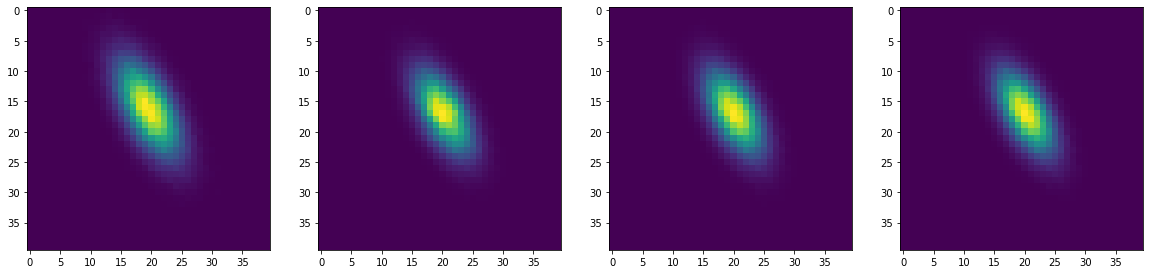

In [11]:
fig,ax = plt.subplots( 1, 4, figsize=(5*4,5))

ax[0].imshow( unweighted_hist_vals)
ax[1].imshow( nn_weighted_hist_vals)
ax[2].imshow( simple_weighted_hist_vals)
ax[3].imshow( analytic_weighted_hist_vals)

#ax[0].imshow( np.flip(np.transpose(unweighted_hist_vals), axis=0) )
#ax[1].imshow( np.flip(np.transpose(nn_weighted_hist_vals), axis=0) )
#ax[2].imshow( np.flip(np.transpose(simple_weighted_hist_vals), axis=0) )
#ax[3].imshow( np.flip(np.transpose(analytic_weighted_hist_vals), axis=0) )




In [12]:
unweighted_hist_vals = np.clip( unweighted_hist_vals, 1e-16,1e20)

nn_ave_weight = nn_weighted_hist_vals / unweighted_hist_vals

simple_ave_weight = simple_weighted_hist_vals / unweighted_hist_vals

analytic_ave_weight = analytic_weighted_hist_vals / unweighted_hist_vals

print(' nn max ave weight: %.2f' % np.max( nn_ave_weight))

print(' simple max ave weight: %.2f' % np.max( simple_ave_weight))

simple_ave_weight = np.clip( simple_ave_weight, 0., np.max( nn_ave_weight))


 nn max ave weight: 0.70
 simple max ave weight: 2.14


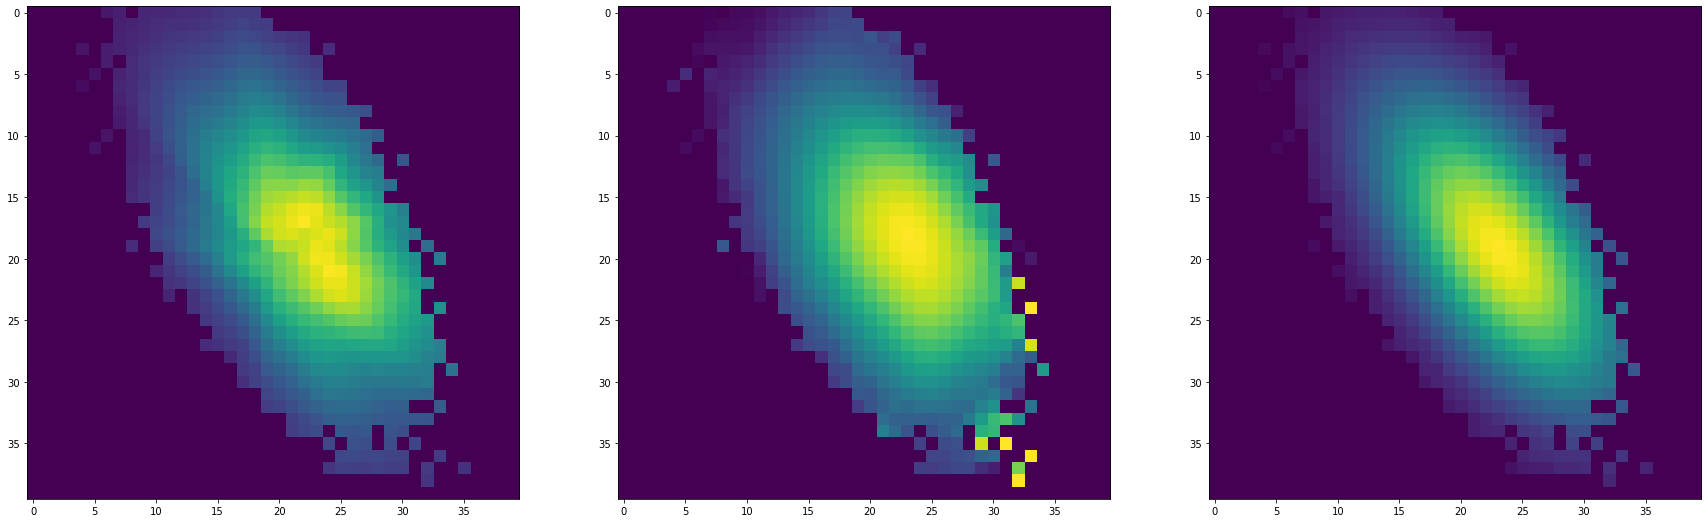

In [13]:
fig,ax = plt.subplots( 1, 3, figsize=(10*3,10))

ax[0].imshow( nn_ave_weight )

ax[1].imshow( simple_ave_weight )

ax[2].imshow( analytic_ave_weight )


In [21]:
ave_weight_diff_nn = nn_ave_weight-analytic_ave_weight
ave_weight_diff_simple = simple_ave_weight-analytic_ave_weight

max_diff = 0.15

print( 'shape of diff : %s' % str(ave_weight_diff_nn.shape))

ave_weight_diff_nn = np.clip(ave_weight_diff_nn, -1*max_diff, max_diff )
ave_weight_diff_simple = np.clip( ave_weight_diff_simple, -1*max_diff, max_diff)

asize = ave_weight_diff_nn.shape[0]

ave_weight_diff_nn[0,0] = max_diff
ave_weight_diff_nn[asize-1,asize-1] = -1*max_diff

ave_weight_diff_simple[0,0] = max_diff
ave_weight_diff_simple[asize-1,asize-1] = -1*max_diff


shape of diff : (40, 40)


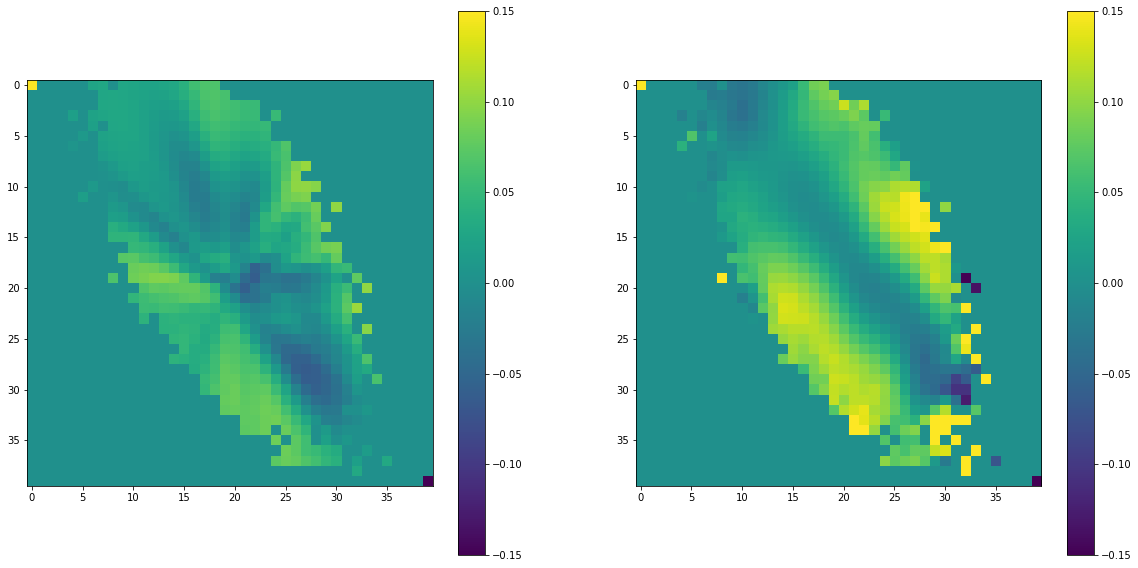

In [22]:
fig,ax = plt.subplots( 1, 2, figsize=(10*2,10))

im0 = ax[0].imshow( ave_weight_diff_nn )
ax[0].figure.colorbar( im0, ax=ax[0] )

im1 = ax[1].imshow( ave_weight_diff_simple )
ax[1].figure.colorbar( im1, ax=ax[1] )


